# WeatherPy
----

## Generate Cities List

* Found the limits of latitude and and longitude here [Mapbox | Help | latitude and longitude](https://docs.mapbox.com/help/glossary/lat-lon/#:~:text=Latitude%20and%20longitude%20are%20a,180%20to%20180%20for%20longitude.).
* Found the random.uniform method at [NumPy.org | Random Sampling](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html)
```
numpy.random.uniform(low=0.0, high=1.0, size=None)
```
* Found documentation and code for citipy here [citipy Release 0.0.5 | Looking up with coordinates](https://libraries.io/pypi/citipy).
```
from citipy import citipy
# Coordinates for nearest city (latitude, longitude)
city = citipy.nearest_city(22.99, 120.21)
# Name of nearest city
city.city_name
# Country of nearest city
city.country_code
```
* Found documentation on date/time stamps on page #67 here: [Python for Data Analysis](https://www.cin.ufpe.br/~embat/Python%20for%20Data%20Analysis.pdf)

* Found documentation on formatting time here: [Python.org | Library | Time](https://docs.python.org/3/library/time.html)

#### Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.

In [34]:
# Dependencies
import os
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
from citipy import citipy
import time # date_time = time.localtime()
import requests

# Import my api keys for Open Weather and Google
from api_keys import weather_api_key

In [35]:
# Create list for latitude/longitude and cities (separate from random versions)
lat_long = []
cities = []

In [36]:
# Create variables for random values
# limits low/high -90/90 for latitude, -180/180 for longitude
# 3000 (the 3rd value) is the amount of items to pull

random_lat = np.random.uniform(low = 19.50139, high = 64.85694, size = 2000)
random_long = np.random.uniform(low = -161.75583, high = -68.01197, size = 2000)
random_lat_long = zip(random_lat, random_long)

# Create a for loop to identify the closest city using citipy        
for lat_long in random_lat_long:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    city = city.title()
    
    if city not in cities:
        # Add geocode to cities list
        cities.append(city)

# Check count of actual cities found out of all the random coordinates generated
print(f"Number of cities found: {len(cities)}.")
city

Number of cities found: 617.


'Kapaa'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [37]:
# Save api key(s) information
url = "http://api.openweathermap.org/data/2.5/weather?" 
units = "imperial" # Thanks to my classmate Dez for warning me about this!

query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Set up lists to hold response data 
# from cities.csv sample in homework instructions, then match up with api specs.
latitude = []
longitude = []
city_name = []
country = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
max_temp = []

#### Open Weather API 
* Data needed from API found at: [Examples of API calls](https://openweathermap.org/current)
>**coord: lon, lat | name | sys:** type, id, message, **country**, sunrise, sunset | **main: temp**, feels_like, temp_min, **temp_max**, pressure, **humidity | clouds: all | dt | wind: speed**, deg

In [38]:
# Create for loop from the list of random cities generated in the first part
# Don't forget a counter and the try exception!

count = 1

print(f"Looking for Open Weather data...")

for city in cities:
    try:
        if(count > 500):
            break
        weather_data = requests.get(f"{query_url}{city}").json()
        
        latitude.append(weather_data["coord"]["lat"])
        longitude.append(weather_data["coord"]["lon"])
        city_name.append(weather_data["name"])
        country.append(weather_data["sys"]["country"])
        temp.append(weather_data["main"]["temp"])
        humidity.append(weather_data["main"]["humidity"])
        cloudiness.append(weather_data["clouds"]["all"])
        wind_speed.append(weather_data["wind"]["speed"])
        date.append(weather_data["dt"])
        max_temp.append(weather_data["main"]['temp_max'])
        
        print(f"Found Open Weather data for {count} of {len(cities)}: {city}")
        count = count + 1
        
    except:
        print(f"Open Weather data not found for: {city}")
    
    continue 

Looking for Open Weather data...
Found Open Weather data for 1 of 617: Makakilo City
Found Open Weather data for 2 of 617: Hilo
Found Open Weather data for 3 of 617: Bethel
Found Open Weather data for 4 of 617: Chapleau
Found Open Weather data for 5 of 617: Ketchikan
Found Open Weather data for 6 of 617: Homer
Found Open Weather data for 7 of 617: Evanston
Found Open Weather data for 8 of 617: Bucerias
Found Open Weather data for 9 of 617: Half Moon Bay
Found Open Weather data for 10 of 617: Thompson
Open Weather data not found for: Attawapiskat
Found Open Weather data for 11 of 617: Kapaa
Found Open Weather data for 12 of 617: Borger
Found Open Weather data for 13 of 617: Austin
Found Open Weather data for 14 of 617: Ucluelet
Found Open Weather data for 15 of 617: Kenai
Found Open Weather data for 16 of 617: Lompoc
Found Open Weather data for 17 of 617: La Ronge
Found Open Weather data for 18 of 617: Marsh Harbour
Found Open Weather data for 19 of 617: Little Current
Found Open Weathe

Found Open Weather data for 165 of 617: Elizabeth City
Found Open Weather data for 166 of 617: Uniontown
Found Open Weather data for 167 of 617: Fairbanks
Found Open Weather data for 168 of 617: Houston
Found Open Weather data for 169 of 617: Henderson
Found Open Weather data for 170 of 617: El Dorado
Found Open Weather data for 171 of 617: Lawrenceburg
Found Open Weather data for 172 of 617: Rock Springs
Found Open Weather data for 173 of 617: Huntsville
Found Open Weather data for 174 of 617: Tomatlan
Found Open Weather data for 175 of 617: Valle De Allende
Found Open Weather data for 176 of 617: Puerto Penasco
Found Open Weather data for 177 of 617: Fillmore
Found Open Weather data for 178 of 617: Progreso
Found Open Weather data for 179 of 617: Mount Pleasant
Found Open Weather data for 180 of 617: North Myrtle Beach
Found Open Weather data for 181 of 617: Key West
Found Open Weather data for 182 of 617: Meaford
Found Open Weather data for 183 of 617: Claresholm
Found Open Weather 

Found Open Weather data for 326 of 617: Dzilam Gonzalez
Found Open Weather data for 327 of 617: Fergus Falls
Found Open Weather data for 328 of 617: Hope
Found Open Weather data for 329 of 617: Bolondron
Found Open Weather data for 330 of 617: Panaba
Found Open Weather data for 331 of 617: Wahpeton
Found Open Weather data for 332 of 617: Batabano
Open Weather data not found for: Longlac
Found Open Weather data for 333 of 617: Wahiawa
Found Open Weather data for 334 of 617: Yorkton
Found Open Weather data for 335 of 617: Gloucester
Found Open Weather data for 336 of 617: Redmond
Found Open Weather data for 337 of 617: Fort Saint James
Found Open Weather data for 338 of 617: Clearlake
Found Open Weather data for 339 of 617: Fort Collins
Found Open Weather data for 340 of 617: Tooele
Found Open Weather data for 341 of 617: Kantunilkin
Found Open Weather data for 342 of 617: Beatrice
Found Open Weather data for 343 of 617: Brockville
Found Open Weather data for 344 of 617: Newport
Found Op

Found Open Weather data for 484 of 617: Pueblo Nuevo
Found Open Weather data for 485 of 617: Cody
Found Open Weather data for 486 of 617: Lac Du Bonnet
Found Open Weather data for 487 of 617: Hudson Bay
Open Weather data not found for: Acuna
Found Open Weather data for 488 of 617: Port Huron
Found Open Weather data for 489 of 617: Williston
Found Open Weather data for 490 of 617: Socorro
Found Open Weather data for 491 of 617: Millinocket
Found Open Weather data for 492 of 617: Sterling
Found Open Weather data for 493 of 617: Sartell
Found Open Weather data for 494 of 617: Okotoks
Found Open Weather data for 495 of 617: Southampton
Found Open Weather data for 496 of 617: Mackenzie
Found Open Weather data for 497 of 617: Preeceville
Found Open Weather data for 498 of 617: Fernie
Found Open Weather data for 499 of 617: Two Rivers
Found Open Weather data for 500 of 617: Lamont


# Create a data frame from cities and lat_long

In [39]:
weather_dict = {
    "Latitude":latitude,
    "Longitude":longitude,
    "City":city_name,
    "Country":country,
    "Temperature":temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Date":date,
    "Maximum Temperature":max_temp    
}

weather_data = pd.DataFrame(weather_dict)
print(weather_data.count())
weather_data.head()

Latitude               500
Longitude              500
City                   500
Country                500
Temperature            500
Humidity               500
Cloudiness             500
Wind Speed             500
Date                   500
Maximum Temperature    500
dtype: int64


,Latitude,Longitude,City,Country,Temperature,Humidity,Cloudiness,Wind Speed,Date,Maximum Temperature
0,21.35,-158.09,Makakilo City,US,75.43,73,1,4.70,1602660294,78.80
1,19.73,-155.09,Hilo,US,70.54,78,1,4.70,1602660294,73.40
2,41.37,-73.41,Bethel,US,46.29,87,1,4.70,1602660294,48.00
3,47.84,-83.40,Chapleau,CA,40.05,85,14,7.43,1602660294,40.05
4,55.34,-131.65,Ketchikan,US,42.80,93,90,0.67,1602660294,42.80


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
weather_data.to_csv("../WeatherPy_output/weather_data.csv", index=False)
weather_data = pd.read_csv("../WeatherPy_output/weather_data.csv")
weather_data

,Latitude,Longitude,City,Country,Temperature,Humidity,Cloudiness,Wind Speed,Date,Maximum Temperature
0,21.35,-158.09,Makakilo City,US,75.43,73,1,4.70,1602660294,78.80
1,19.73,-155.09,Hilo,US,70.54,78,1,4.70,1602660294,73.40
2,41.37,-73.41,Bethel,US,46.29,87,1,4.70,1602660294,48.00
3,47.84,-83.40,Chapleau,CA,40.05,85,14,7.43,1602660294,40.05
4,55.34,-131.65,Ketchikan,US,42.80,93,90,0.67,1602660294,42.80
...,...,...,...,...,...,...,...,...,...,...
495,55.30,-123.17,Mackenzie,CA,30.20,92,90,2.24,1602660357,30.20
496,51.95,-102.67,Preeceville,CA,34.93,78,100,8.19,1602660358,34.93
497,49.50,-115.07,Fernie,CA,41.86,75,75,8.05,1602660319,42.80
498,44.15,-87.57,Two Rivers,US,47.08,65,1,8.05,1602660358,48.99


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [41]:
#  Get the indices of cities that have humidity over 100%.
hum_100 = weather_data[weather_data["Humidity"]>100]
len(hum_100)

0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Your first requirement is to create a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot add a sentence or too explaining what the code is and analyzing.

## Latitude vs. Temperature Plot

Text(0.5, 0, 'Latitude')

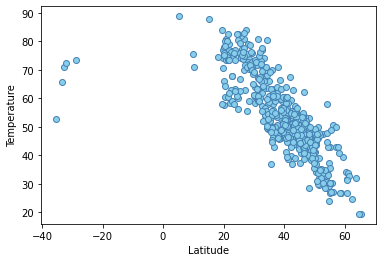

In [42]:
# Tell matplotlib to create a scatter plot based upon the above data
plt.scatter(latitude, temp, marker="o", facecolors="skyblue", edgecolors="steelblue")
plt.ylabel("Temperature")
plt.xlabel("Latitude")

## Latitude vs. Humidity Plot

Text(0.5, 0, 'Latitude')

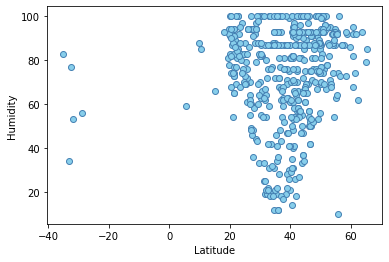

In [43]:
# Tell matplotlib to create a scatter plot based upon the above data
plt.scatter(latitude, humidity, marker="o", facecolors="skyblue", edgecolors="steelblue")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

## Latitude vs. Cloudiness Plot

Text(0.5, 0, 'Latitude')

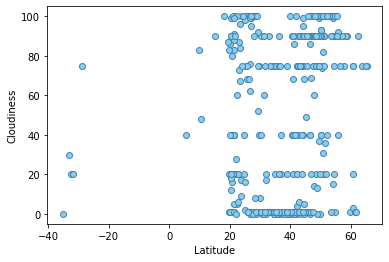

In [44]:
# Tell matplotlib to create a scatter plot based upon the above data
plt.scatter(latitude, cloudiness, marker="o", facecolors="skyblue", edgecolors="steelblue")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

## Latitude vs. Wind Speed Plot

Text(0.5, 0, 'Latitude')

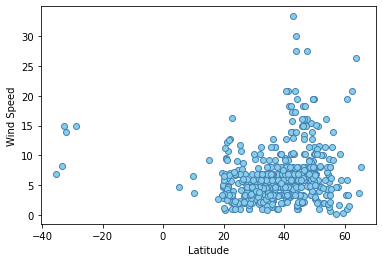

In [45]:
# Tell matplotlib to create a scatter plot based upon the above data
plt.scatter(latitude, wind_speed, marker="o", facecolors="skyblue", edgecolors="steelblue")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

## Linear Regression

#### Your second requirement is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

#### After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression